# Machine Learning 1, Übung 2
(c) 2023 by Harald Bögeholz

Der unten stehende Code erzeugt einige pseudo-zufällige Datenpunkte. Sehen Sie sich die Inhalte der Variablen an.

In [21]:
import numpy as np

np.random.seed(42)
m = 20
x = np.random.rand(m) * 10 - 5
y = 0.5*x*x + x + 3 + np.random.randn(m)

Ein paar Zeilen Code zur Vorbereitung des Folgenden:

In [22]:
import math
import matplotlib.pyplot as plt

x_range = max(x) - min(x)
x_min = min(x) - 0.1 * x_range
x_max = max(x) + 0.1 * x_range
linX = np.linspace(x_min, x_max, num=400)
y_range = max(y) - min(y)
y_min = min(y) - 0.1 * y_range
y_max = max(y) + 0.1 * y_range

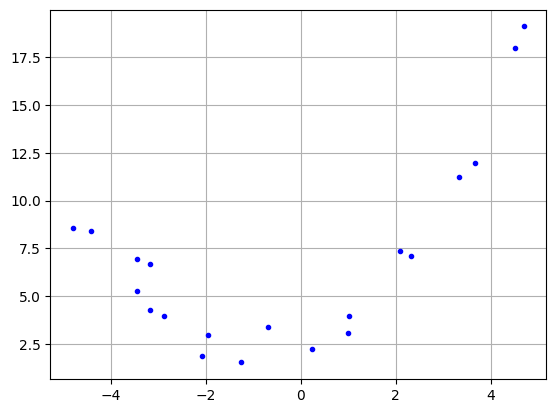

In [23]:
plt.plot(x,y,"b.")
plt.grid()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

Für das Modell `LinearRegression` müssen wir unseren Datenvektor `x` in eine Matrix mit einer einzigen Spalte überführen:

In [26]:
X = x.reshape(-1,1)

In [27]:
model.fit(X, y)

LinearRegression()

In [28]:
y_hat = model.predict(X)

In [29]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.3416143209559088

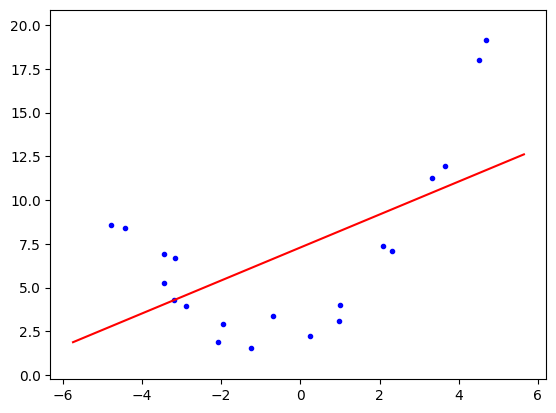

In [30]:
plt.ylim(y_min, y_max)
plt.plot(x, y, "b.")
plt.plot(linX, model.predict(linX.reshape(-1,1)), "r-")
plt.show()

`PolynomialFeatures` erweitert eine Feature-Matrix um zusätzliche Spalten mit polynomialen Features, in unserem Fall mit Potenzen unseres Vektors.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

Der Anschauung halber erst einmal ein einfacher Testvektor:

In [32]:
test = np.array(range(-3,4)).reshape(-1,1)
test

array([[-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3]])

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)

Die transformierte Matrix enthält in der zweiten Spalte das Quadrat der ersten:

In [34]:
poly.fit_transform(test)

array([[-3.,  9.],
       [-2.,  4.],
       [-1.,  1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.]])

Jetzt wenden wir dies auf unseren Datensatz `X` an:

In [35]:
X_poly = poly.fit_transform(X)
X_poly

array([[-1.25459881,  1.57401818],
       [ 4.50714306, 20.3143386 ],
       [ 2.31993942,  5.3821189 ],
       [ 0.98658484,  0.97334965],
       [-3.4398136 , 11.83231757],
       [-3.4400548 , 11.833977  ],
       [-4.41916388, 19.52900938],
       [ 3.66176146, 13.40849697],
       [ 1.01115012,  1.02242456],
       [ 2.08072578,  4.32941976],
       [-4.79415506, 22.98392271],
       [ 4.69909852, 22.08152692],
       [ 3.32442641, 11.05181094],
       [-2.87660889,  8.27487872],
       [-3.18175033, 10.12353515],
       [-3.1659549 , 10.02327044],
       [-1.95757757,  3.83210994],
       [ 0.24756432,  0.06128809],
       [-0.68054981,  0.46314805],
       [-2.0877086 ,  4.35852719]])

In [36]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

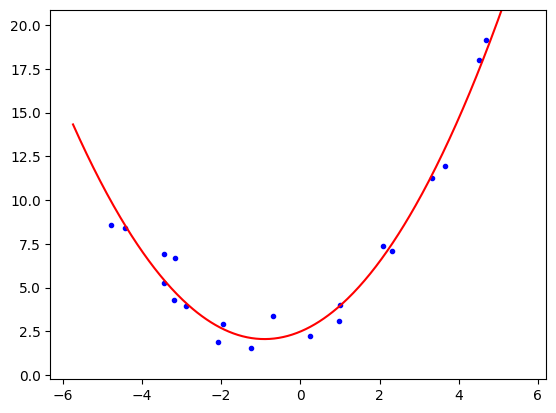

In [37]:
linX_poly = poly.fit_transform(linX.reshape(-1,1))
plt.ylim(y_min, y_max)
plt.plot(x, y, "b.")
plt.plot(linX, poly_model.predict(linX_poly), "r-")
plt.show()

In [38]:
y_poly_hat = poly_model.predict(X_poly)

In [39]:
r2_score(y, y_poly_hat)

0.9681123113639274

In [40]:
poly_model.coef_

array([0.94864877, 0.52388449])

Setzen Sie oben bei `PolynomialFeatures(degree=2, include_bias=False)` versuchsweise höhere Werte für `degree` ein und sehen Sie sich den resultierenden Plot an, indem Sie mit *Run all cells* das ganze Notebook noch einmal ausführen!